# EDA (Exploratory Data Analysis)

 Consiste en investigar y comprender los datos mediante técnicas visuales y estadísticas para descubrir patrones, identificar anomalías, probar hipótesis y extraer información útil. <div>El EDA ayuda a los científicos de datos y analistas a obtener una comprensión inicial de los datos antes de aplicar modelos predictivos o análisis más avanzados.

## 1. Conociemiento del negocio 

### ***Contexto***

---------------------------------------
##### StreamMaster (Empresa Fictiosa) es una start-up que ofrece servicios de agregación de plataformas de streaming. El objetivo es desarrollar un sistema de recomendación de películas y series para los usuarios. Sin embargo, los datos están desorganizados y necesitan un trabajo considerable de ingeniería de datos antes de poder entrenar y desplegar un modelo de machine learning.

**Preguntas**
>
>
> **1.Datos** <div>
> 1. ¿En qué formato se encuentra los datos? 
> 2. ¿Qué variables (Columnas) estan disponibles en el cojunto de datos?  
> 3. ¿Qué tipos de datos están incluidos? 
> 4. ¿Hay Valores faltantes?
> 5. ¿Hay columnas anidadas? </div>
>  
> **2.Analisís Descriptivo** <div>
> 1. ¿Cuál son las películas más vistas para cada año?
> 2. ¿Cuál es la distribución de las variables categóricas (frecuencia de cada categoría)? </div>
> 
> **3. Analisís de películas** <div>
> 1. ¿Cuáles son los películas con la mayor popularidad? 
> 2. ¿Cómo se distribuyen las reseñas para cada película? son positivas o negativas? 
> 3. ¿Existe alguna correlación entre el runtime (Duración de la película) de una película y su popularidad o calificación?</div>
> 
> **4. Analísis de Reseñas** <div>
> 1.  ¿Cómo se distribuyen las calificaciones de las reseñas a lo largo del tiempo? 
> 2. Hay alguna tendencia temporal en las calificaciones de las reseñas (por ejemplo, aumentos o disminuciones notables en ciertos períodos)? </div>
>
>
> **5. Adicional** <div>
> 1. ¿Qué variables están más correlacionadas con las calificaciones de las películas (precio, cantidad de reseñas, cantidad de items, etc.)? </div>

***Las preguntas pueden cambiar***

## 2. Entendimiento de datos

### 2.1 Importamos  librerías

In [1]:
# Importamos las librerias 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

### 2.2 Carga inicial de los datos

In [2]:
# Cargar el archivo 
movies = pd.read_parquet("Data/movies.parquet")
equipo = pd.read_parquet("Data/equipo.parquet")
actores= pd.read_parquet("Data/actores.parquet")

In [3]:
# Convertimos en Dataframe 
df_movies = pd.DataFrame(movies)
df_team = pd.DataFrame(equipo)
df_actors = pd.DataFrame(actores)

### 2.3 Análisis inicial de los datos

In [4]:
# Tamaño de nuestra data 
print("Tamaño de nuestra data en df_games",df_movies.shape)
print("Tamaño de nuestra data en df_team", df_team.shape)
print("Tamaño de nuestra data en df_actors", df_actors.shape)

Tamaño de nuestra data en df_games (157676, 17)
Tamaño de nuestra data en df_team (48999, 5)
Tamaño de nuestra data en df_actors (560837, 4)


In [5]:
# veamos un poco el tipo de dato y la columnas 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157676 entries, 0 to 178365
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_movie           157676 non-null  int16         
 1   name               157676 non-null  string        
 2   original_language  157676 non-null  string        
 3   release_date       157676 non-null  datetime64[ns]
 4   release_year       157676 non-null  int16         
 5   genre_id           157676 non-null  int16         
 6   genre_name         157676 non-null  string        
 7   popularity         157676 non-null  float32       
 8   runtime            157676 non-null  int8          
 9   vote_average       157676 non-null  float16       
 10  vote_count         157676 non-null  int32         
 11  company_id         157676 non-null  int16         
 12  company_name       157676 non-null  string        
 13  revenue            157676 non-null  int32        

In [6]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48999 entries, 0 to 465084
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id_movie        48999 non-null  int32 
 1   team_member_id  48999 non-null  int32 
 2   job             48999 non-null  object
 3   name            48999 non-null  object
 4   gender          48999 non-null  int8  
dtypes: int32(2), int8(1), object(2)
memory usage: 1.5+ MB


In [7]:
df_actors.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560837 entries, 0 to 564890
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_movie    560837 non-null  int32 
 1   gender      560837 non-null  int8  
 2   actor_id    560837 non-null  int32 
 3   name_actor  560837 non-null  object
dtypes: int32(2), int8(1), object(1)
memory usage: 13.4+ MB


Observaciones:
- Tenemos una buena cantidad de datos para analizar.
- Nuestros datos tienen un buen tipo de dato(Ya previamente seleccionado)
- Tenemos  variables cualitativas y cuantitativas.
- No hay filas anidadas. 
- vamos a verifica si hay valores faltantes y duplicados, antes de realizar algun analisis. 

In [8]:
# df_games valores faltantes y duplicados 
print("Faltantes", df_movies.isna().sum())
print("Duplicados", df_movies.duplicated().sum())

Faltantes id_movie             0
name                 0
original_language    0
release_date         0
release_year         0
genre_id             0
genre_name           0
popularity           0
runtime              0
vote_average         0
vote_count           0
company_id           0
company_name         0
revenue              0
budget               0
return               0
overview             0
dtype: int64
Duplicados 0


In [9]:
# df_team valores faltantes y duplicados 
print("Faltantes", df_team.isna().sum())
print("Duplicados", df_team.duplicated().sum())

Faltantes id_movie          0
team_member_id    0
job               0
name              0
gender            0
dtype: int64
Duplicados 0


In [10]:
# df_actors valores faltantes y duplicados 
print("Faltantes", df_actors.isna().sum())
print("Duplicados", df_actors.duplicated().sum())

Faltantes id_movie      0
gender        0
actor_id      0
name_actor    0
dtype: int64
Duplicados 0


In [11]:
# Vista del df(Dataframe)
df_actors.head(3)

,id_movie,gender,actor_id,name_actor
0,862,2,31,Tom Hanks
1,862,2,12898,Tim Allen
2,862,2,7167,Don Rickles


In [12]:
df_team.head(3)

,id_movie,team_member_id,job,name,gender
0,862,7879,Director,John Lasseter,2
109,8844,4945,Director,Joe Johnston,2
122,15602,26502,Director,Howard Deutch,2


In [13]:
# Vista del df(Dataframe)
df_movies.head(3)

,id_movie,name,original_language,release_date,release_year,genre_id,genre_name,popularity,runtime,vote_average,vote_count,company_id,company_name,revenue,budget,return,overview
0,862,Toy Story,en,1995-10-30,1995,16,Animation,21.946943,81,7.699219,5415,3,Pixar Animation Studios,373554033,30000000,12.453125,"Led by Woody, Andy's toys live happily in his ..."
1,862,Toy Story,en,1995-10-30,1995,35,Comedy,21.946943,81,7.699219,5415,3,Pixar Animation Studios,373554033,30000000,12.453125,"Led by Woody, Andy's toys live happily in his ..."
2,862,Toy Story,en,1995-10-30,1995,10751,Family,21.946943,81,7.699219,5415,3,Pixar Animation Studios,373554033,30000000,12.453125,"Led by Woody, Andy's toys live happily in his ..."


### 2.4. Análisis de variables Cuantitativas

#### Comenzamos el analisis !!!!

In [14]:
df_movies.describe()

,id_movie,release_date,release_year,genre_id,popularity,runtime,vote_average,vote_count,company_id,revenue,budget,return
count,157676.000000,157676,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000,157676.000000,1.576760e+05,1.576760e+05,1.576760e+05
mean,2931.457647,1996-07-18 17:02:34.981100544,1996.036562,1941.965030,5.431647,74.185494,NaN,294.697494,5518.666728,3.095322e+07,1.222562e+07,NaN
min,-32763.000000,1878-06-14 00:00:00,1878.000000,12.000000,0.000000,-128.000000,0.000000,0.000000,-32767.000000,-2.147484e+09,0.000000e+00,-9.062500e+00
25%,-11529.000000,1988-01-01 00:00:00,1988.000000,18.000000,1.045736,85.000000,5.398438,9.000000,539.750000,0.000000e+00,0.000000e+00,0.000000e+00
50%,6387.000000,2004-05-04 00:00:00,2004.000000,35.000000,3.321765,95.000000,6.101562,32.000000,4928.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,15864.000000,2011-07-29 00:00:00,2011.000000,80.000000,7.933043,106.000000,6.800781,161.000000,11128.000000,4.882577e+06,8.000000e+06,9.069824e-02
max,32767.000000,2020-12-16 00:00:00,2020.000000,10770.000000,547.488281,127.000000,10.000000,14075.000000,32732.000000,2.068224e+09,3.800000e+08,inf
std,17653.198496,NaN,20.808616,4017.985726,9.404199,66.052851,0.000000,845.928659,10891.905258,1.087038e+08,3.038370e+07,NaN


                                 name  popularity
14984                         Minions  547.488281
30656                    Wonder Woman  294.337036
3023             Beauty and the Beast  287.253662
2558                      Baby Driver  228.032745
3354                       Big Hero 6  213.849915
6325                         Deadpool  187.860489
9792   Guardians of the Galaxy Vol. 2  185.330994
2484                           Avatar  185.070892
12123                       John Wick  183.870377
9558                        Gone Girl  154.801010


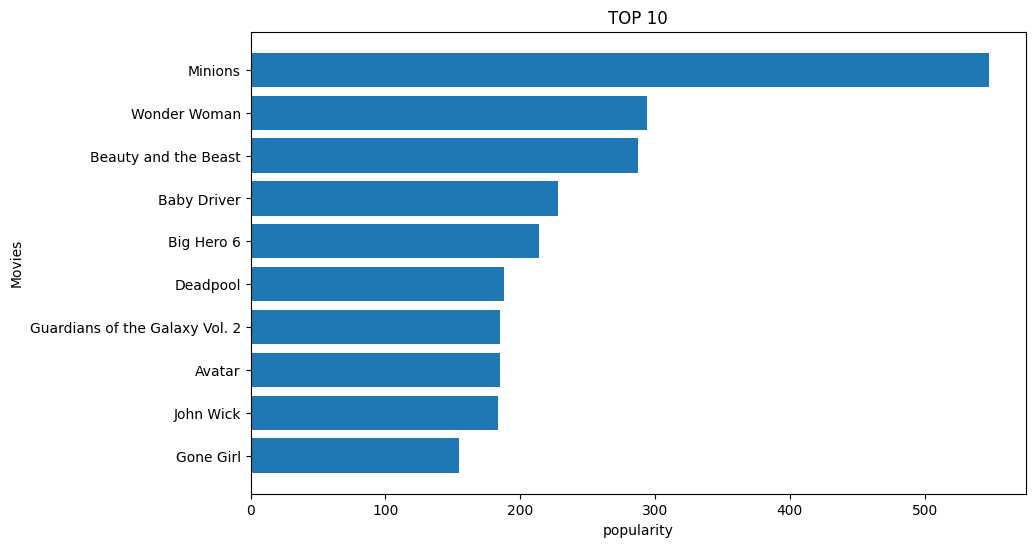

In [15]:
# Veamos las peliculas mas populares 
filter1 = df_movies[['name', 'popularity']]
filter2 = filter1.groupby('name')['popularity'].max().reset_index()
filter3 = filter2.sort_values(by = 'popularity', ascending = False)
top10 = filter3.head(10)
print(top10)

# Graficamos
plt.figure(figsize=(10, 6))
plt.barh(top10['name'], top10['popularity'])
plt.xlabel('popularity')
plt.ylabel('Movies')
plt.title('TOP 10')
plt.gca().invert_yaxis()
plt.show()

release_year
2015    7420
2014    7319
2009    6899
2013    6760
2016    6578
        ... 
1891       4
1888       2
1878       1
1890       1
1893       1
Name: count, Length: 131, dtype: int64


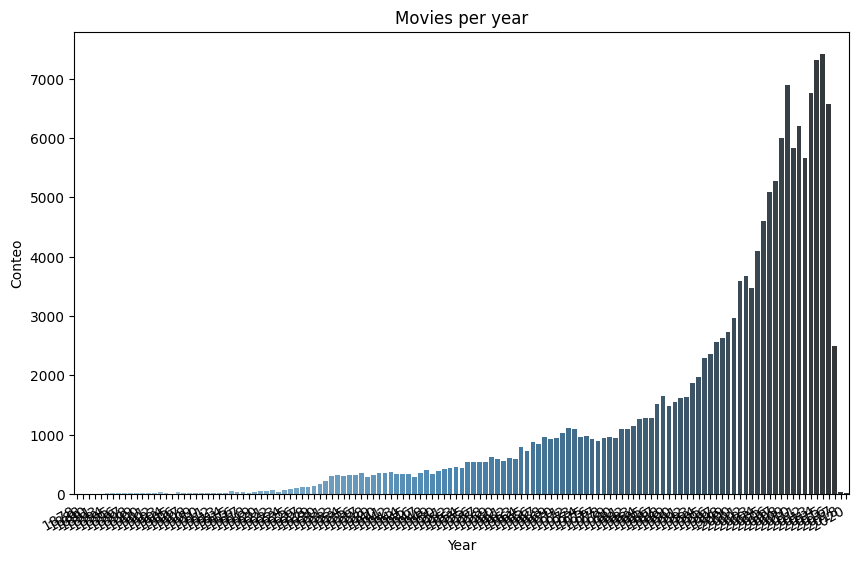

In [16]:
# Veamos cuantas peliculas hay por anio
year = df_movies['release_year'].value_counts()
print(year)

# Ahora en un grafico 
plt.figure(figsize=(10, 6))
sns.barplot(x = year.index, y = year.values, palette = 'Blues_d')
plt.title('Movies per year')
plt.xlabel('Year')
plt.ylabel('Conteo')
plt.xticks(rotation= 30, ha='right')
plt.show()

No se Puede apreciar muy bien el grafico ahora vamos a limitar a los 20 primeros anios

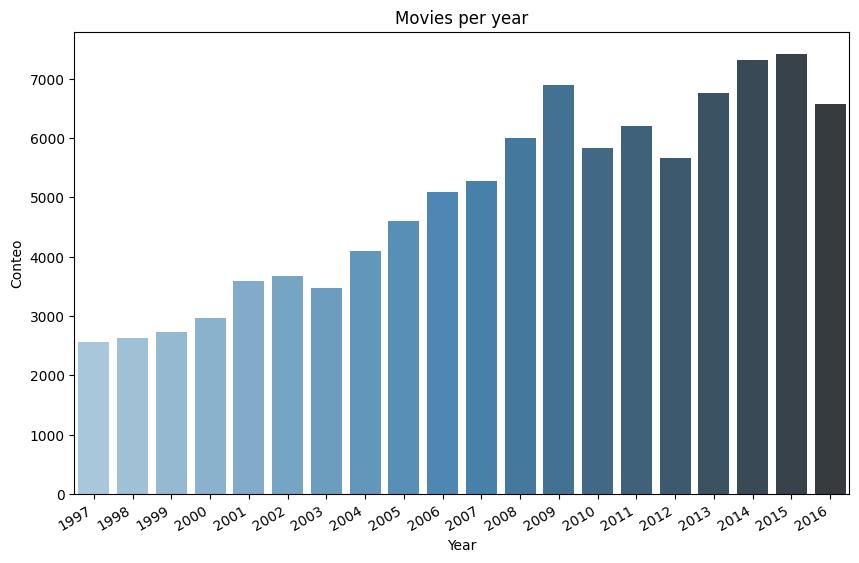

In [17]:
# Filtramos 
top_20 = year.head(20)
# Ahora en un grafico
plt.figure(figsize=(10, 6))
sns.barplot(x = top_20.index, y = top_20.values, palette = 'Blues_d')
plt.title('Movies per year')
plt.xlabel('Year')
plt.ylabel('Conteo')
plt.xticks(rotation= 30, ha='right')
plt.show()

***Mucho Mejor***

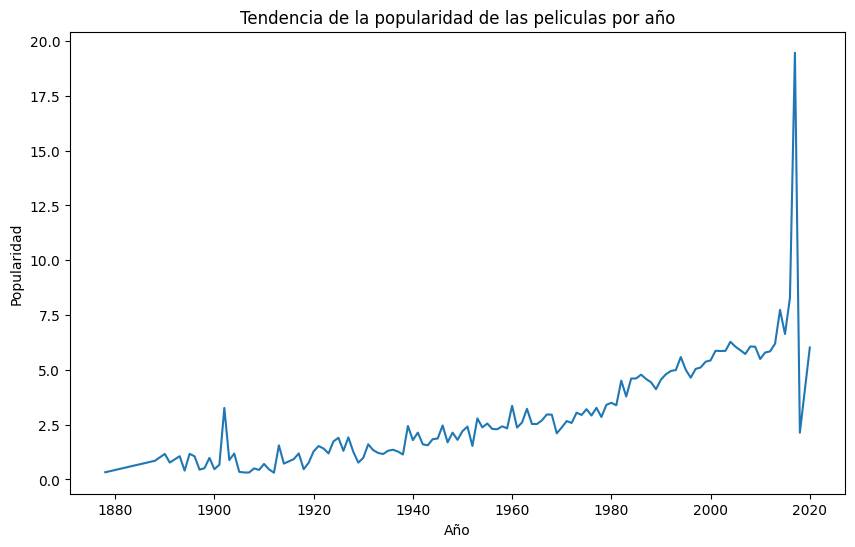

In [18]:
# Veamos la popularidad a lo largo del Tiempo 
filtro = df_movies.groupby('release_year')['popularity'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='popularity', data=filtro)
plt.title('Tendencia de la popularidad de las peliculas por año')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.show()

                                        name  vote_average
13777              Looking for Maria Sanchez          10.0
29594                        Vessel of Wrath          10.0
13378            Let No Man Write My Epitaph          10.0
22310                           The Bachelor          10.0
23541                 The Dragon Lives Again          10.0
28592                            Tokyo Ghoul          10.0
19869                             Shark Kill          10.0
4367                               Butterfly          10.0
12894  LEGO DC Super Hero Girls: Brain Drain          10.0
6533                           Der Herr Karl          10.0


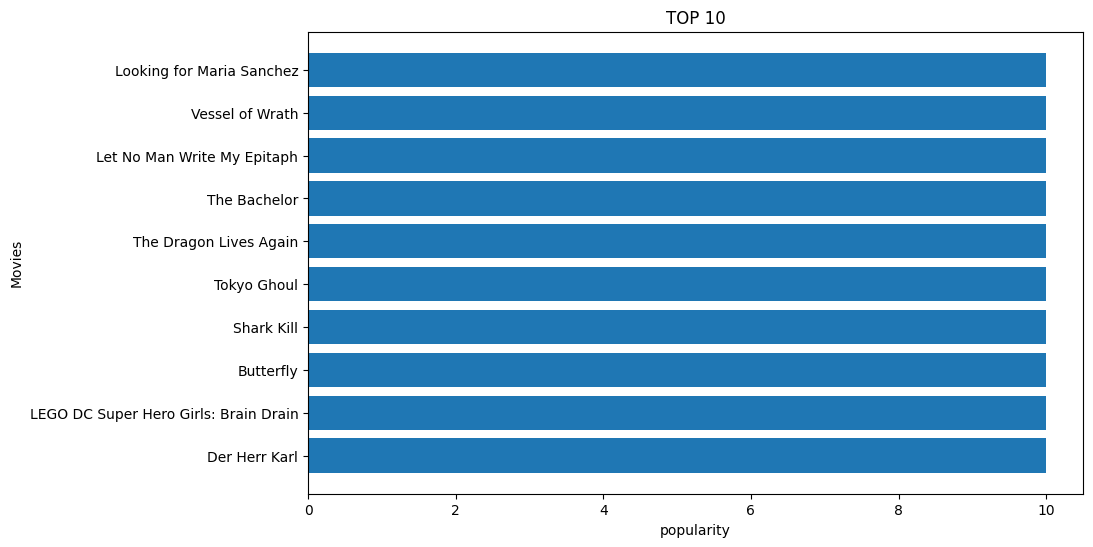

In [19]:
# Veamos las mejores peliculas por puntaje en vote_average
# Veamos las peliculas mas populares 
filter1 = df_movies[['name', 'vote_average']]
filter2 = filter1.groupby('name')['vote_average'].max().reset_index()
filter3 = filter2.sort_values(by = 'vote_average', ascending = False)
top10 = filter3.head(10)
print(top10)

# Grafica
plt.figure(figsize=(10, 6))
plt.barh(top10['name'], top10['vote_average'])
plt.xlabel('popularity')
plt.ylabel('Movies')
plt.title('TOP 10')
plt.gca().invert_yaxis()
plt.show()

Insight adquirido ninguno busquemos otra manera de observa esta columna  

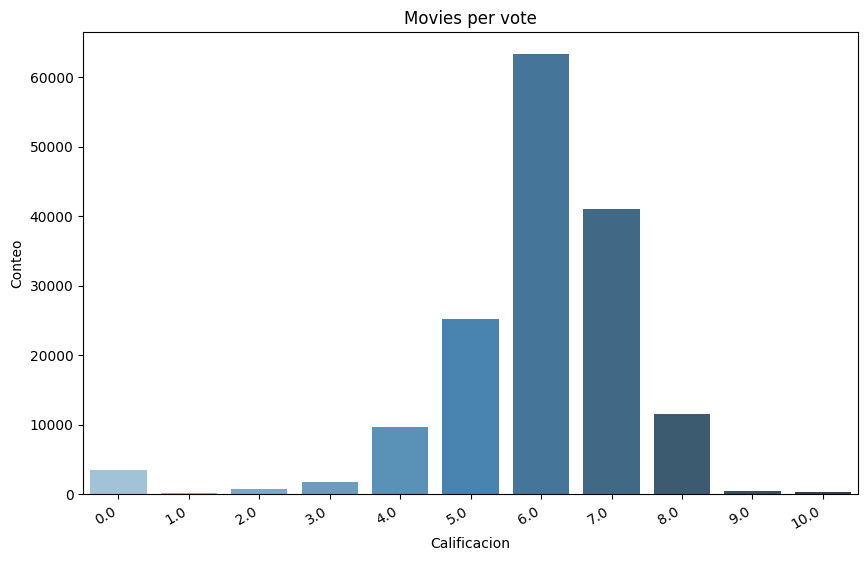

In [20]:
# Veamos cuantas peliculas hay por anio
df_movies['vote_average'] = df_movies['vote_average'].round() 
vote = df_movies['vote_average'].value_counts().sort_index()

# Ahora en un grafico 
plt.figure(figsize=(10, 6))
sns.barplot(x = vote.index, y = vote.values, palette = 'Blues_d')
plt.title('Movies per vote')
plt.xlabel('Calificacion')
plt.ylabel('Conteo')
plt.xticks(rotation= 30, ha='right')
plt.show()

Insights adquiridos:
- Pocas peliculas tienen puntaje alto
- muchas peliculas tiene puntaje medio bajo y medio alto, podemos decir que la mediana es 6
- Muy pocas peliculas tiene puntaje muy bajo

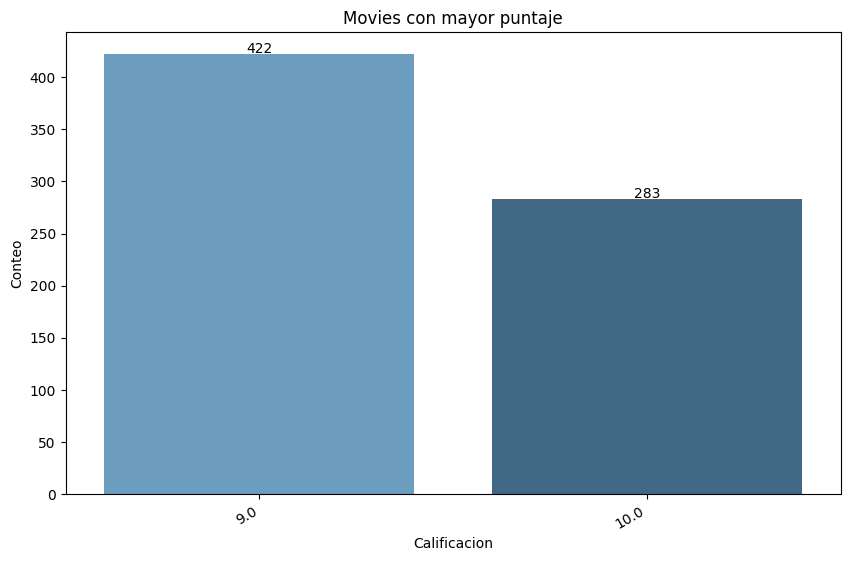

In [54]:
# veamos cuantas peliculas son puntaje 9, 10
vote = df_movies[df_movies['vote_average'] >= 9]
vote_counts = vote['vote_average'].value_counts().sort_index()

# Ahora en un grafico 
plt.figure(figsize=(10, 6))
sns.barplot(x = vote_counts.index, y = vote_counts.values, palette = 'Blues_d')
plt.title('Movies con mayor puntaje')
plt.xlabel('Calificacion')
plt.ylabel('Conteo')
plt.xticks(rotation= 30, ha='right')

# Añadir anotaciones a cada barra
for index, value in enumerate(vote_counts.values):
    plt.text(x=index, y=value + 1, s=str(value), ha='center') 


plt.show()

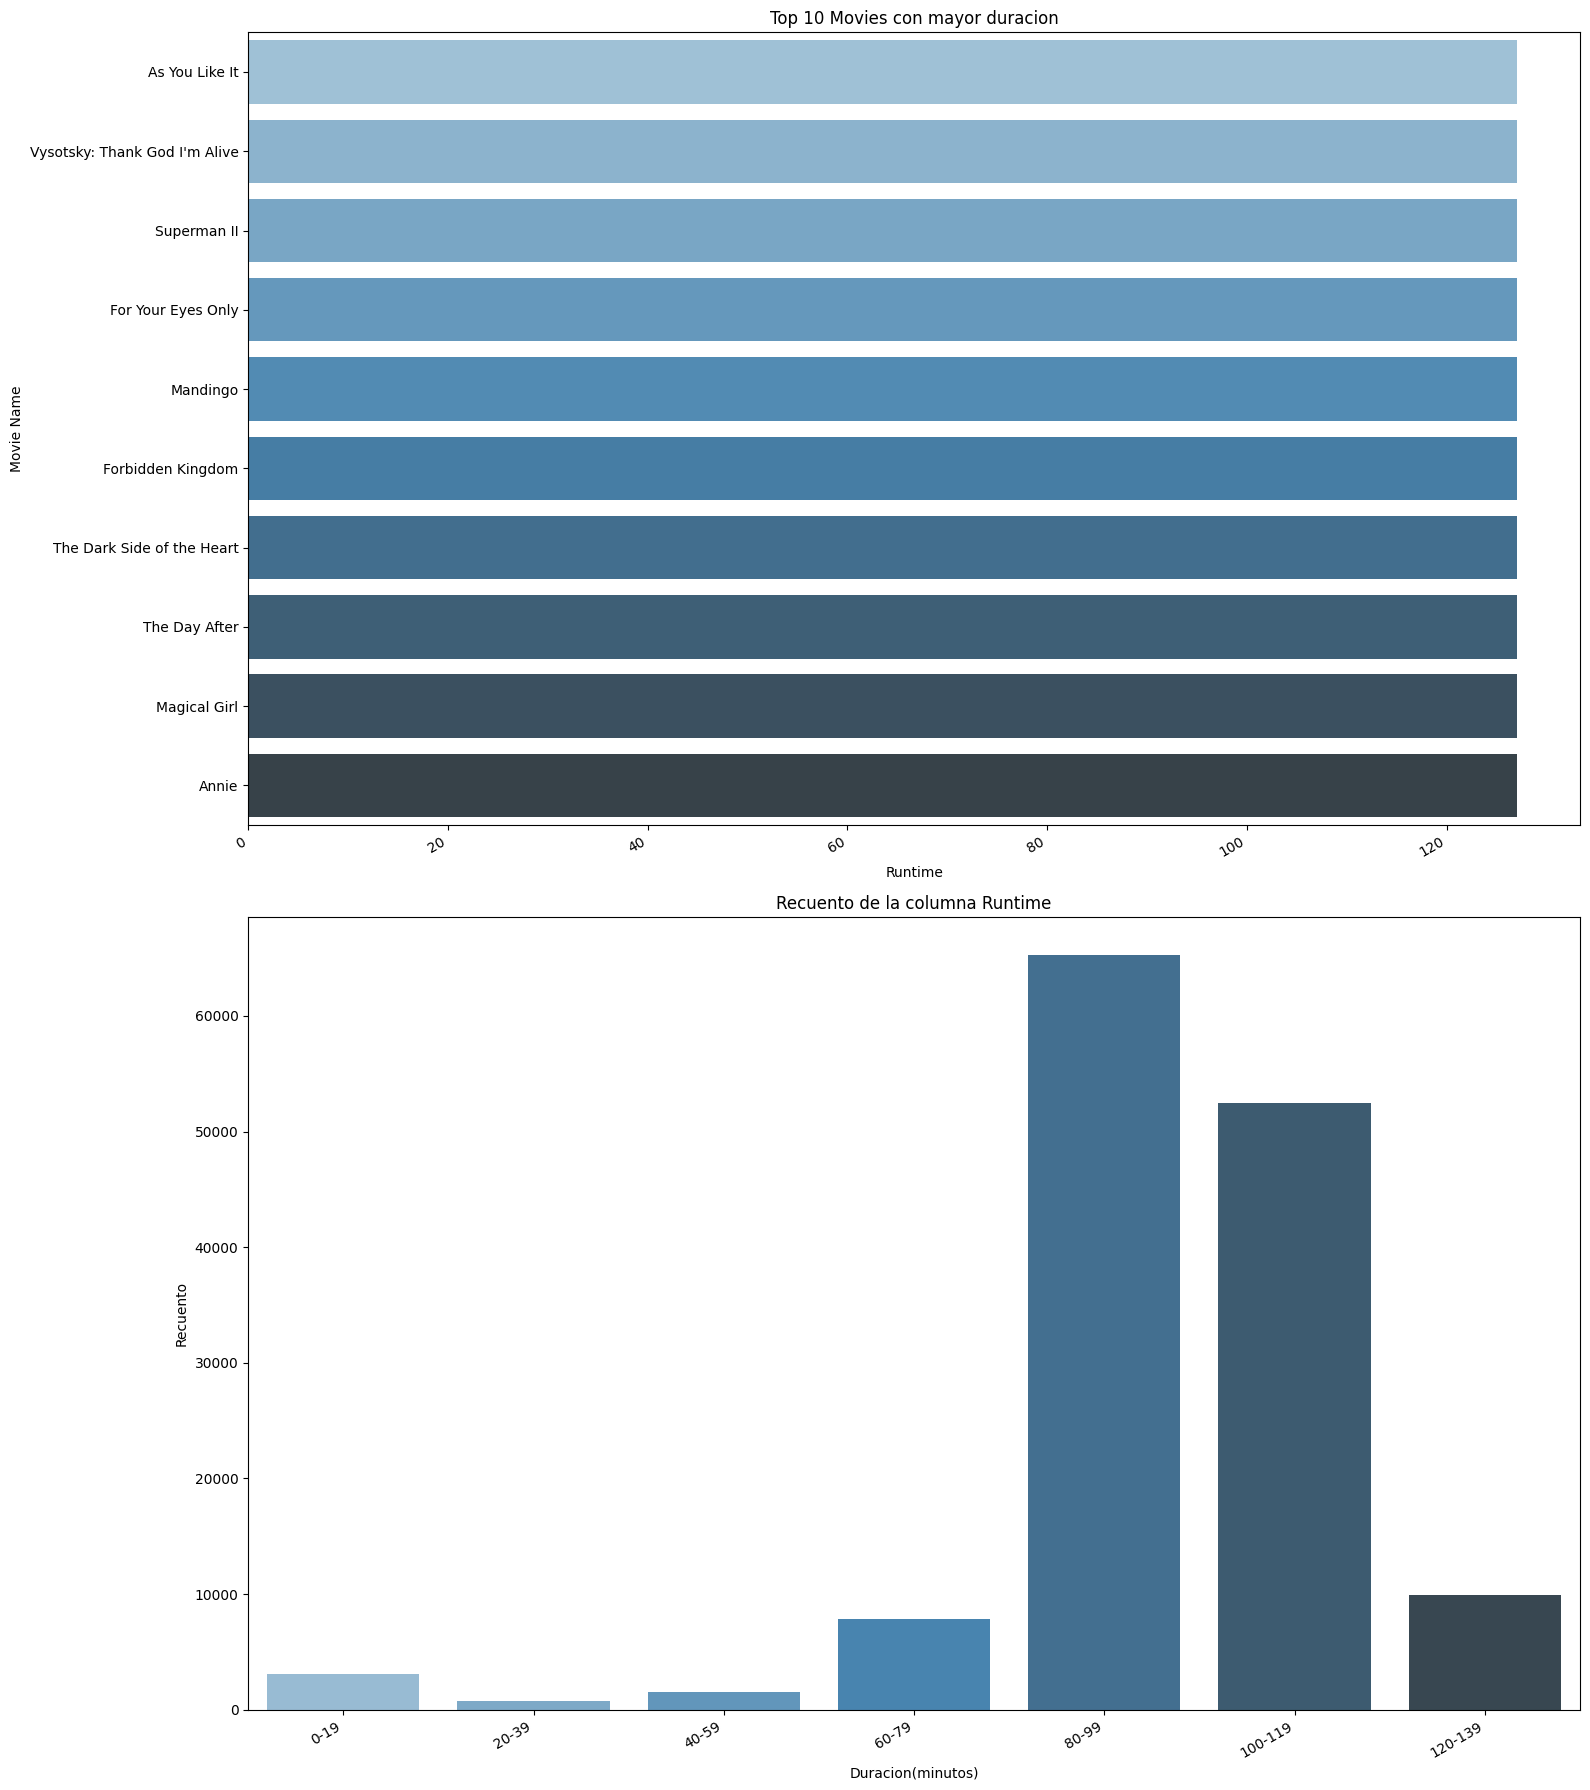

In [22]:
# Veamos las peliculas con la mayor duracion de tiempo y el recuento de Runtime

fig, axes = plt.subplots(2, 1, figsize=(16, 18), sharey= False)

# primer Grafico (Runtime)
time  = df_movies.groupby('name')['runtime'].max().reset_index()
time1 = time.sort_values(by='runtime', ascending=False)
top10 = time1.head(10)

# print(top10)
sns.barplot(x='runtime', y='name', data=top10, palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 Movies con mayor duracion')
axes[0].set_xlabel('Runtime')
axes[0].set_ylabel('Movie Name')


# Segundo grafico (Recuento de 20 a 20)
bins = range(0, df_movies['runtime'].max() + 20, 20)
labels = [f'{i}-{i+19}' for i in bins[: -1]]
df_movies['runtime_binned'] = pd.cut(df_movies['runtime'], bins=bins, labels=labels, right=False)

# Contamos las ocurrencias de cada bin 
run = df_movies['runtime_binned'].value_counts().sort_values().reset_index()
run.columns = ['runtime_bin', 'count']

# Grafico
sns.barplot(x='runtime_bin', y='count', data=run, palette='Blues_d', ax=axes[1])
axes[1].set_title('Recuento de la columna Runtime')
axes[1].set_xlabel('Duracion(minutos)')
axes[1].set_ylabel('Recuento')

for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=30, ha='right')
    
plt.tight_layout()
plt.show()

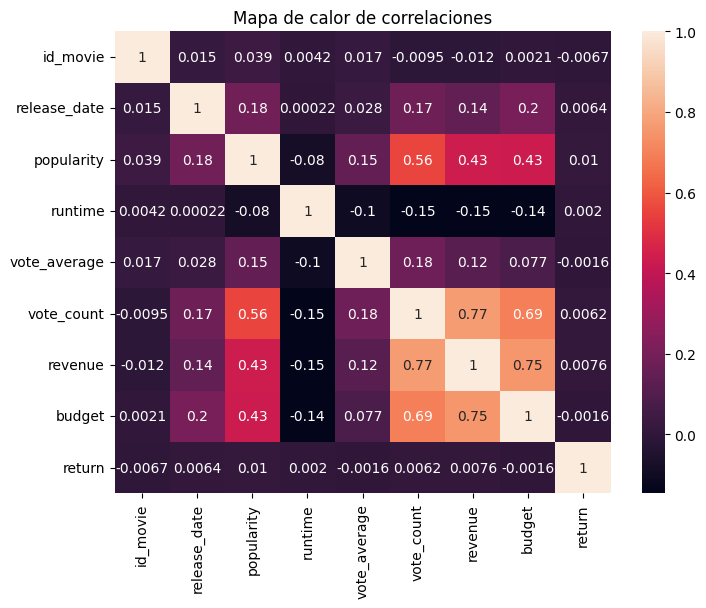

In [23]:
# veamos la correlacion entre variable cuantitativas 
plt.figure(figsize=(8, 6))
corr = df_movies[['id_movie', 'release_date', 'popularity', 'runtime', 'vote_average', 'vote_count', 'revenue', 'budget', 'return']]
corr = corr.corr()
sns.heatmap(corr, annot=True)
plt.title('Mapa de calor de correlaciones')
plt.show()

### 2.5 Análisis de variables Cualitativas

In [25]:
"""
Este análisis consiste en averiguar la distribución de las peliculas en diferentes categorías del conjunto de datos.
Luego visualizaremos usando el módulo seaborn.
"""

cat_counts = df_movies['genre_name'].value_counts()
print(cat_counts)

genre_name
Drama              36390
Comedy             20572
Thriller           15124
Action             12518
Romance            11344
Crime               8442
Horror              7911
Adventure           7234
Science Fiction     5745
Mystery             4735
Fantasy             4565
Family              4529
Animation           3324
Documentary         3094
History             2945
War                 2720
Music               2233
Western             1625
Foreign             1599
TV Movie            1027
Name: count, dtype: Int64


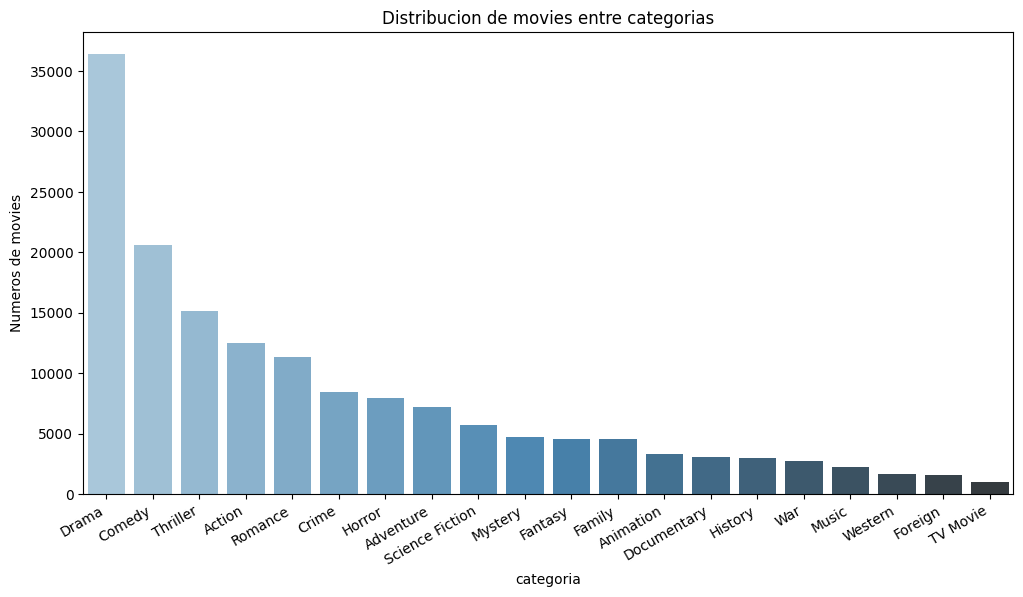

In [26]:
# Graficamos 
plt.figure(figsize=(12, 6))
sns.barplot(x= cat_counts.index, y=cat_counts.values, palette='Blues_d')
plt.title('Distribucion de movies entre categorias')
plt.xlabel('categoria')
plt.ylabel('Numeros de movies')
plt.xticks(rotation = 30, ha='right')
plt.show()

***Vamos analizar la distribucion de la popularidad, el promedio de votos, el recuento de votos, el revenue(Recaudacion), bugdet (Presupuesto) para cada categoria. Usaremos un diagrama de caja para trazar distribuciones.***

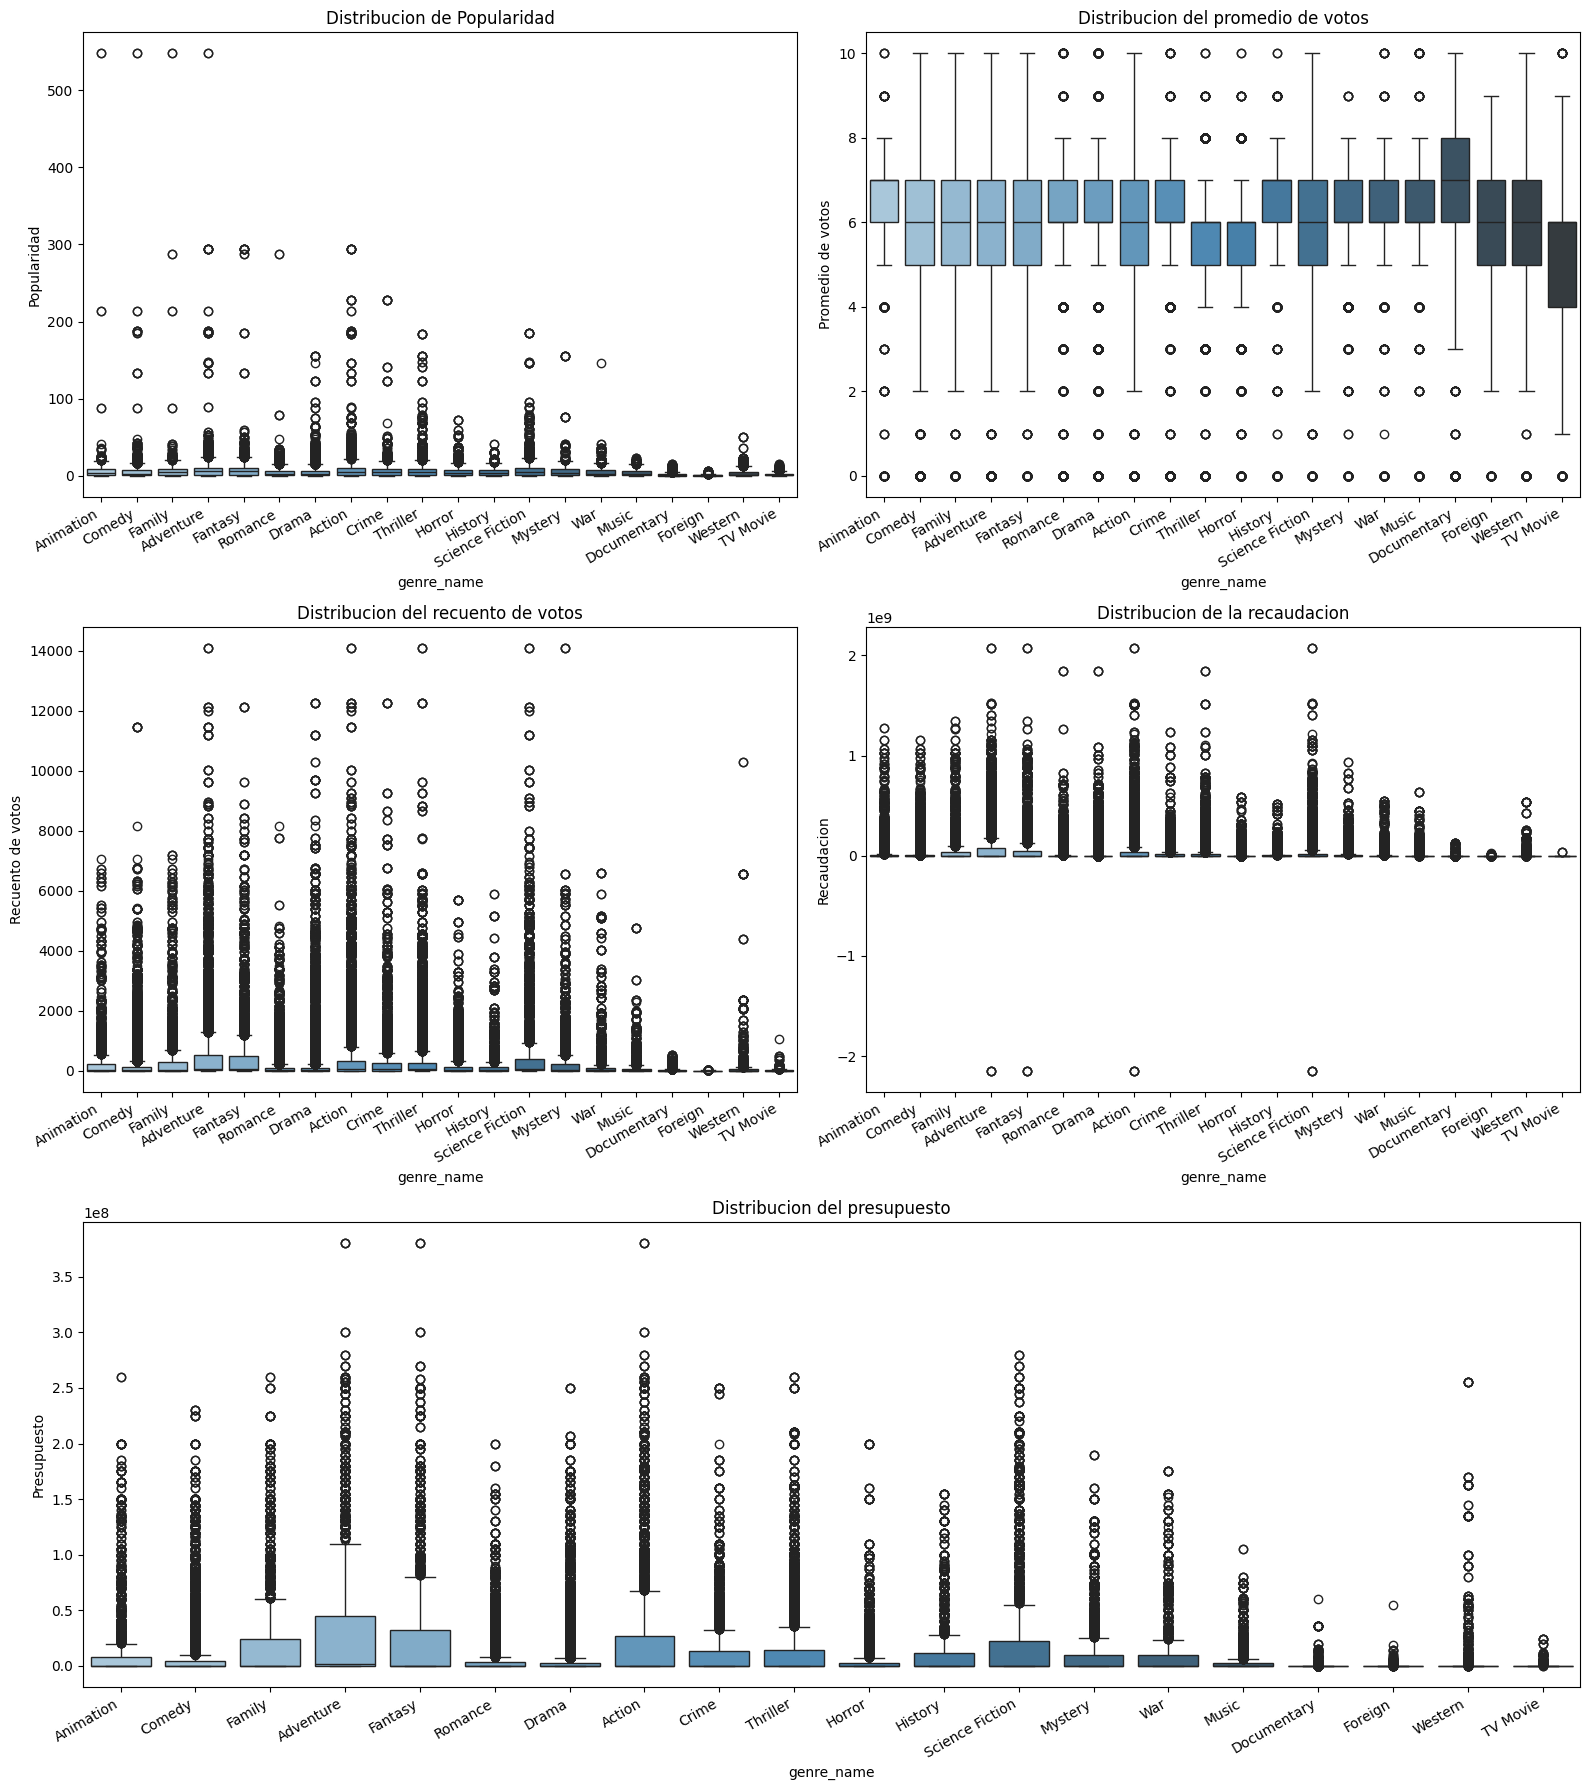

In [35]:
# Grafico con 2 columnas y 3 filas en la misma salida
fig = plt.figure(figsize=(16, 18))
gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1])

# Popularidad
ax0 = fig.add_subplot(gs[0,0]) 
sns.boxplot(x ='genre_name', y = 'popularity',data = df_movies, palette = 'Blues_d', ax= ax0)
ax0.set_title('Distribucion de Popularidad')
ax0.set_ylabel('Popularidad')

# Promedio de votos
ax1 = fig.add_subplot(gs[0, 1])
sns.boxplot(x ='genre_name', y = 'vote_average',data = df_movies, palette = 'Blues_d', ax= ax1)
ax1.set_title('Distribucion del promedio de votos')
ax1.set_ylabel('Promedio de votos')

# Recuento de Votos
ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(x ='genre_name', y = 'vote_count',data = df_movies, palette = 'Blues_d', ax= ax2)
ax2.set_title('Distribucion del recuento de votos')
ax2.set_ylabel('Recuento de votos')

# Recaudacion(Revenue)
ax3 = fig.add_subplot(gs[1, 1])
sns.boxplot(x ='genre_name', y = 'revenue',data = df_movies, palette = 'Blues_d', ax= ax3)
ax3.set_title('Distribucion de la recaudacion')
ax3.set_ylabel('Recaudacion')

# Presupuesto (Bugdet)
ax4 = fig.add_subplot(gs[2, :])
sns.boxplot(x ='genre_name', y = 'budget',data = df_movies, palette = 'Blues_d', ax= ax4)
ax4.set_title('Distribucion del presupuesto')
ax4.set_ylabel('Presupuesto')

for ax in [ax0, ax1, ax2, ax3, ax4]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()

In [27]:
df_movies.describe()

,id_movie,release_date,release_year,genre_id,popularity,runtime,vote_average,vote_count,company_id,revenue,budget,return
count,157676.000000,157676,157676.000000,157676.000000,157676.000000,157676.000000,157676.0,157676.000000,157676.000000,1.576760e+05,1.576760e+05,1.576760e+05
mean,2931.457647,1996-07-18 17:02:34.981100544,1996.036562,1941.965030,5.431647,74.185494,NaN,294.697494,5518.666728,3.095322e+07,1.222562e+07,NaN
min,-32763.000000,1878-06-14 00:00:00,1878.000000,12.000000,0.000000,-128.000000,0.0,0.000000,-32767.000000,-2.147484e+09,0.000000e+00,-9.062500e+00
25%,-11529.000000,1988-01-01 00:00:00,1988.000000,18.000000,1.045736,85.000000,5.0,9.000000,539.750000,0.000000e+00,0.000000e+00,0.000000e+00
50%,6387.000000,2004-05-04 00:00:00,2004.000000,35.000000,3.321765,95.000000,6.0,32.000000,4928.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,15864.000000,2011-07-29 00:00:00,2011.000000,80.000000,7.933043,106.000000,7.0,161.000000,11128.000000,4.882577e+06,8.000000e+06,9.069824e-02
max,32767.000000,2020-12-16 00:00:00,2020.000000,10770.000000,547.488281,127.000000,10.0,14075.000000,32732.000000,2.068224e+09,3.800000e+08,inf
std,17653.198496,NaN,20.808616,4017.985726,9.404199,66.052851,0.0,845.928659,10891.905258,1.087038e+08,3.038370e+07,NaN


In [46]:
"""
Vamos a examinar las categorias a partir de popularidad, el promedio de votos, el recuento de votos, el revenue(Recaudacion), bugdet (Presupuesto) para cada categoria.
Usaremos funciones de agregacion
"""

# Determinar las columnas que queremos agregar 
agregaciones = {
    'popularity'    : 'sum',
    'vote_average'  : 'mean',
    'vote_count'    : 'sum',
    'revenue'       : 'sum',
    'budget'        : 'sum'   
}

# Agrupamos por categoria
category_vote = df_movies.groupby('genre_name').agg(agregaciones).sort_values('genre_name', ascending=False)

# Calculamos el porcentaje del total de votos, la popularidad, el presupuesto, y la recaudacion
total_popularity = category_vote['popularity'].sum()
total_vote_count = category_vote['vote_count'].sum()
percent_popularity = (category_vote['popularity'] / total_popularity) * 100 
percent_vote_count = (category_vote['vote_count'] / total_vote_count) * 100

# Creamos un nuevo df 

df_result = pd.DataFrame({
    'Total de Votos'           : category_vote['vote_count'],
    '% Votos'                  : percent_vote_count,
    'Promedio de Votos'        : category_vote['vote_average'].round(2),
    'Total de Popularidad'     : category_vote['popularity'].round(2),
    '% de Popularidad'         : percent_popularity,
    'Total de Recaudacion'     : category_vote['revenue'],
    'Total de Presupuesto'     : category_vote['budget']
}) 

df_result


,Total de Votos,% Votos,Promedio de Votos,Total de Popularidad,% de Popularidad,Total de Recaudacion,Total de Presupuesto
genre_name,,,,,,,
Western,280089,0.602773,5.46,6025.970215,0.703606,19326302710,12166187929
War,635583,1.367824,6.28,13038.469727,1.522402,61031929511,30291138254
Thriller,5459291,11.748819,5.82,98850.773438,11.542051,490395463156,209492453943
TV Movie,24421,0.052556,5.24,2270.570068,0.265117,126000000,553947000
Science Fiction,3654225,7.864176,5.63,43661.921875,5.098069,343692873760,135319784857
Romance,1874938,4.035012,5.99,49248.960938,5.750425,215091740509,77152190627
Mystery,1463682,3.149958,5.99,27836.240234,3.250225,121011684229,50308689412
Music,303779,0.653756,6.15,8896.419922,1.038767,38179633840,12104767278
Horror,1505382,3.239699,5.44,40331.578125,4.709210,105427011228,40721001429


In [48]:
# Buscamos la categoria mas votada 
max_voted = df_result['Total de Votos'].idxmax()
mas_votes = df_result['Total de Votos'].max()

print(f"La categoria '{max_voted}' es la categoria mas votada, con  {mas_votes:,} votos")


La categoria 'Drama' es la categoria mas votada, con  6,823,773 votos


In [50]:
# Buscamos la categoria con mayor presupuesto 
max_budget = df_result['Total de Presupuesto'].idxmax()
mas_budged = df_result['Total de Presupuesto'].max()

print(f"La categoria '{max_budget}' es la categoria con mayor presupuesto, con  {mas_budged:,} invertidos en toda su historia")

La categoria 'Action' es la categoria con mayor presupuesto, con  297,290,244,249 invertidos en toda su historia


In [53]:
# Buscamos la categoria con mayor Recaudacion 
max_reve = df_result['Total de Recaudacion'].idxmax()
mas_reve = df_result['Total de Recaudacion'].max()

print(f"La categoria '{max_reve}' es la categoria con mayor recaudacion, con  {mas_reve:,} recaudados en toda su historia")

La categoria 'Action' es la categoria con mayor recaudacion, con  738,153,618,379 recaudados en toda su historia


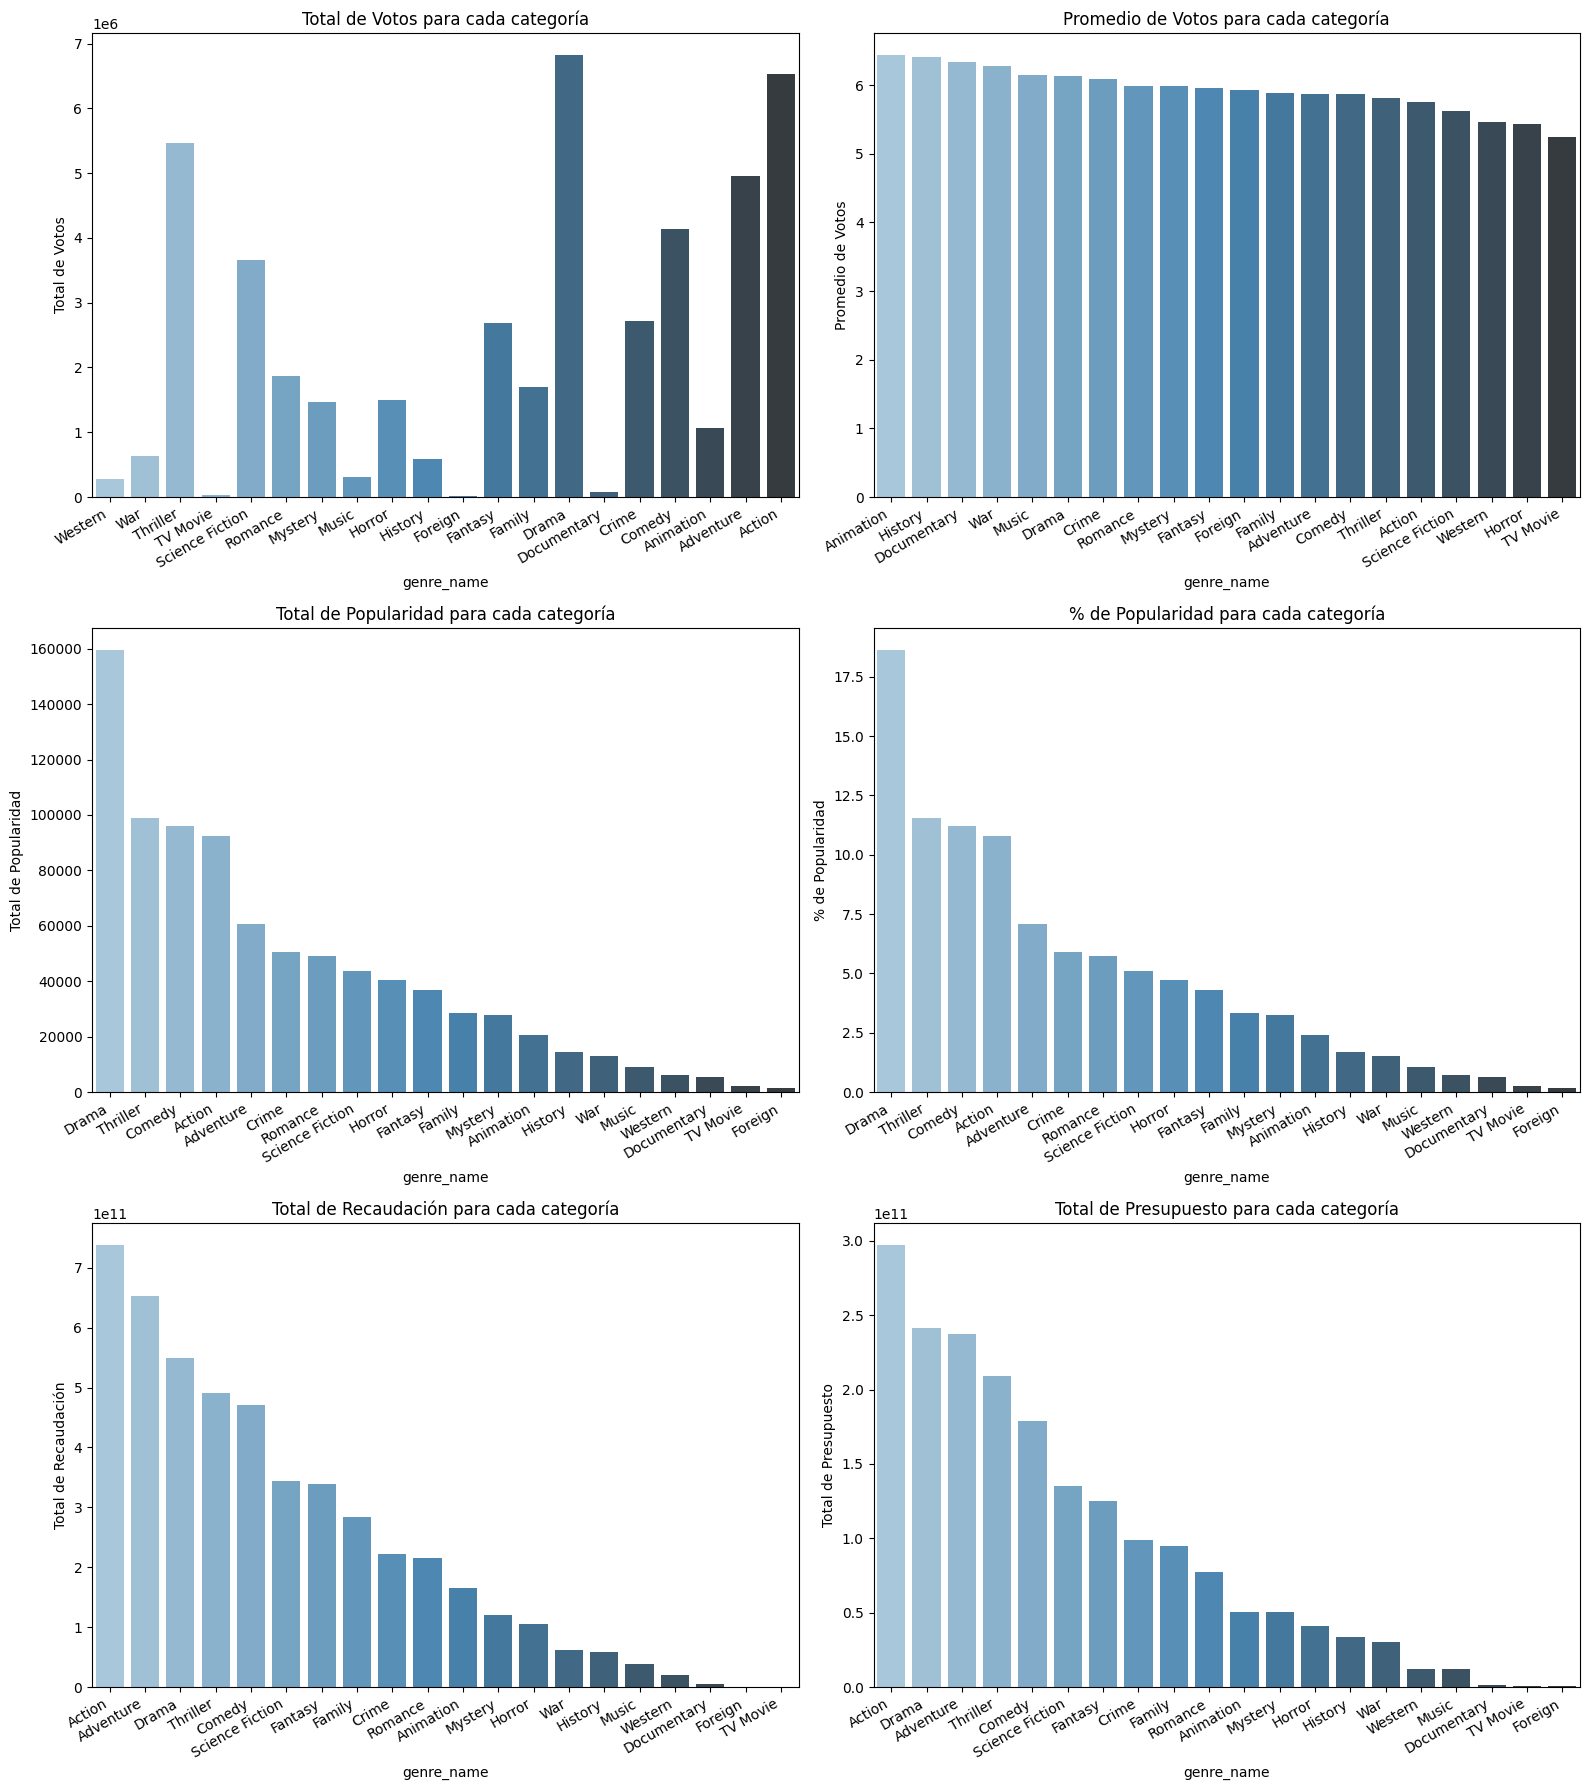

In [55]:
# Vamos a graficar los datos para tener una mejor comprensión y visualización

fig, axes = plt.subplots(3, 2, figsize=(16, 18), sharey=False)

# Primer gráfico: Total de Votos
sns.barplot(x=df_result.index, y=df_result['Total de Votos'], palette='Blues_d', order=df_result.index, ax=axes[0, 0])
axes[0, 0].set_title('Total de Votos para cada categoría')
axes[0, 0].set_ylabel('Total de Votos')
axes[0, 0].set_xticklabels(labels=df_result.index, rotation=30, ha='right')

# Segundo gráfico: Promedio de Votos
df_result_sorted = df_result.sort_values(by='Promedio de Votos', ascending=False)
sns.barplot(x=df_result_sorted.index, y=df_result_sorted['Promedio de Votos'], palette='Blues_d', order=df_result_sorted.index, ax=axes[0, 1])
axes[0, 1].set_title('Promedio de Votos para cada categoría')
axes[0, 1].set_ylabel('Promedio de Votos')
axes[0, 1].set_xticklabels(labels=df_result_sorted.index, rotation=30, ha='right')

# Tercer gráfico: Total de Popularidad
df_result_sorted = df_result.sort_values(by='Total de Popularidad', ascending=False)
sns.barplot(x=df_result_sorted.index, y=df_result_sorted['Total de Popularidad'], palette='Blues_d', order=df_result_sorted.index, ax=axes[1, 0])
axes[1, 0].set_title('Total de Popularidad para cada categoría')
axes[1, 0].set_ylabel('Total de Popularidad')
axes[1, 0].set_xticklabels(labels=df_result_sorted.index, rotation=30, ha='right')

# Cuarto gráfico: % de Popularidad
df_result_sorted = df_result.sort_values(by='% de Popularidad', ascending=False)
sns.barplot(x=df_result_sorted.index, y=df_result_sorted['% de Popularidad'], palette='Blues_d', order=df_result_sorted.index, ax=axes[1, 1])
axes[1, 1].set_title('% de Popularidad para cada categoría')
axes[1, 1].set_ylabel('% de Popularidad')
axes[1, 1].set_xticklabels(labels=df_result_sorted.index, rotation=30, ha='right')

# Quinto gráfico: Total de Recaudación
df_result_sorted = df_result.sort_values(by='Total de Recaudacion', ascending=False)
sns.barplot(x=df_result_sorted.index, y=df_result_sorted['Total de Recaudacion'], palette='Blues_d', order=df_result_sorted.index, ax=axes[2, 0])
axes[2, 0].set_title('Total de Recaudación para cada categoría')
axes[2, 0].set_ylabel('Total de Recaudación')
axes[2, 0].set_xticklabels(labels=df_result_sorted.index, rotation=30, ha='right')

# Sexto gráfico: Total de Presupuesto
df_result_sorted = df_result.sort_values(by='Total de Presupuesto', ascending=False)
sns.barplot(x=df_result_sorted.index, y=df_result_sorted['Total de Presupuesto'], palette='Blues_d', order=df_result_sorted.index, ax=axes[2, 1])
axes[2, 1].set_title('Total de Presupuesto para cada categoría')
axes[2, 1].set_ylabel('Total de Presupuesto')
axes[2, 1].set_xticklabels(labels=df_result_sorted.index, rotation=30, ha='right')

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()
